1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceiling of

In [2]:
def converter(x, starting_base, arriving_base):
    if starting_base == 'bin':
        if arriving_base == 'dec':
            return int(x, base = 2)
        else:
            print('Case not handled.')
    elif starting_base == 'hex':
        if arriving_base == 'dec':
            return int(x, base = 16)
        else:
            print('Case not handled.')
    elif starting_base == 'dec':
        if arriving_base == 'bin':
            return bin(x)
        elif arriving_base == 'hex':
            return hex(x)
        else:
            print('Case not handled.')
    else:
        print('Case not handled.')

In [7]:
print(converter(10, 'dec', 'bin'))
print(converter(10, 'dec', 'hex'))
print(converter('0111', 'bin', 'hex'))
print(converter('0111', 'bin', 'dec'))
print(converter('0ae2', 'hex', 'dec'))

0b1010
0xa
Case not handled.
None
7
2786


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [36]:
sign = '1' # -1
exp = '10000000' # 128 (equal to the bias + 1)
frac_mantissa = '1'
for i in range(22):
    frac_mantissa += '0' # mantissa = (1.1000..0)2 -> 1.5 in decimal base
test_string = sign+exp+frac_mantissa
print('Test string: ', test_string, '\n')
print(len(test_string))

def single_precision_interpreter(string):
    if len(string) == 32:
        s = (-1)**int(string[0])
        e = -127
        for i in range(1,9):
            e = e + int(string[i])*2**(8-i)
        m = 1
        for i in range(1,24):
            m = m + int(string[i+8])/2**i
        return s*pow(m,e)
    else:
        print('Input string doesn\'t have 32 bits')

print(single_precision_interpreter(test_string))


Test string:  11000000010000000000000000000000 

32
-1.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [50]:
overflow = 1.

i = 0
# this works because python can exceed the 64 bits for integers, but not for floats
while(overflow == 2**i and i < 10000):
    i = i+1
    overflow *= 2
print('Max exponent of 2**i before overflow: i = ', i, '\n')
print('Corresponding number: ', 2**i)

Max exponent of 2**i before overflow: i =  1024 

Corresponding number:  179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216


In [55]:
underflow = 1.
j = 0
T = True
while(T and j < 100000):
    j = j+1
    underflow /= 2
    print('underflow at step {} : {}'.format(j, underflow) )
    try:
        T = underflow*2**(j)
    except:
        print('Overflow error')
        T = False
    
print('Max exponent of 2**(-i) before underflow: i = ', j-1, '\n')
print('Corresponding number: ', 2**(-j+1))

underflow at step 1 : 0.5
underflow at step 2 : 0.25
underflow at step 3 : 0.125
underflow at step 4 : 0.0625
underflow at step 5 : 0.03125
underflow at step 6 : 0.015625
underflow at step 7 : 0.0078125
underflow at step 8 : 0.00390625
underflow at step 9 : 0.001953125
underflow at step 10 : 0.0009765625
underflow at step 11 : 0.00048828125
underflow at step 12 : 0.000244140625
underflow at step 13 : 0.0001220703125
underflow at step 14 : 6.103515625e-05
underflow at step 15 : 3.0517578125e-05
underflow at step 16 : 1.52587890625e-05
underflow at step 17 : 7.62939453125e-06
underflow at step 18 : 3.814697265625e-06
underflow at step 19 : 1.9073486328125e-06
underflow at step 20 : 9.5367431640625e-07
underflow at step 21 : 4.76837158203125e-07
underflow at step 22 : 2.384185791015625e-07
underflow at step 23 : 1.1920928955078125e-07
underflow at step 24 : 5.960464477539063e-08
underflow at step 25 : 2.9802322387695312e-08
underflow at step 26 : 1.4901161193847656e-08
underflow at step 2

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [60]:
# inizialization of variables used in the while loop
exp = 1.
x = 1.
y = 0.5
precision = 2**(-exp)

while(x != y and precision < 2000):
    precision = 2**(-exp)
    y = x
    x += precision
    exp += 1

print('Machine precision : ', precision, ' equal to 2**(-{})'.format(int(exp)))

Machine precision :  5.551115123125783e-17  equal to 2**(-55)


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [84]:
import math

# (a)
def solve_quadratic(a,b,c):
    
    # this is correct
    delta_squared = b**2 - 4*a*c
    print('Delta squared: ', delta_squared )
    
    #check if the square root gives problem
    delta = math.sqrt(b**2 - 4*a*c)
    if delta**2 != delta_squared:
        print('Approximation: (sqrt(delta))**2 - delta_squared =', delta**2 - delta_squared)
    
    diff_numerator = -b + math.sqrt(b**2 - 4*a*c)
    if diff_numerator + b != delta:
        print('First numerator: ', diff_numerator  )
    
    x1 = ( -b + math.sqrt(b**2 - 4*a*c) )/ (2*a)
    
    sum_numerator = -b - math.sqrt(b**2 - 4*a*c)
    if sum_numerator + b != - delta:
        print('Second numerator: ', sum_numerator  )
        
    x2 =  (-b - math.sqrt(b**2 - 4*a*c) )/ (2*a)
    return x1, x2

# (b)
def solve_quadratic2(a,b,c):
    x1 = 2*c / (-b - math.sqrt(b**2 - 4*a*c))
    x2 =  2*c / (-b + math.sqrt(b**2 - 4*a*c))
    return x1, x2

def solve_quadratic3(a,b,c):
    x1 = 2*c / (-b - math.sqrt(b**2 - 4*a*c))
    x2 =  (-b - math.sqrt(b**2 - 4*a*c) )/ (2*a)
    return x1, x2

def solve_quadratic4(a,b,c):
    x2 = 2*c / (-b + math.sqrt(b**2 - 4*a*c))
    x1 =  (-b + math.sqrt(b**2 - 4*a*c) )/ (2*a)
    return x1, x2
    
a = 0.001
b = 1000
c = 0.001

print('Results with first method: ', solve_quadratic(a,b,c), '\n')
print('Results with second method: ', solve_quadratic2(a,b,c), '\n')
print('Results with third method: ',solve_quadratic3(a,b,c), '\n')
print('Results with fourth method: ',solve_quadratic4(a,b,c), '\n')

a = 1
b = 1000000
c = 1

print('Results with first method: ', solve_quadratic(a,b,c), '\n')
print('Results with second method: ', solve_quadratic2(a,b,c), '\n')
print('Results with third method: ',solve_quadratic3(a,b,c), '\n')
print('Results with fourth method: ',solve_quadratic4(a,b,c), '\n')


Delta squared:  999999.999996
Approximation: (sqrt(delta))**2 - delta_squared = 1.1641532182693481e-10
Results with first method:  (-9.999894245993346e-07, -999999.999999) 

Results with second method:  (-1.000000000001e-06, -1000010.5755125057) 

Results with third method:  (-1.000000000001e-06, -999999.999999) 

Results with fourth method:  (-9.999894245993346e-07, -1000010.5755125057) 

Delta squared:  999999999996
Results with first method:  (-1.00000761449337e-06, -999999.999999) 

Results with second method:  (-1.000000000001e-06, -999992.38556461) 

Results with third method:  (-1.000000000001e-06, -999999.999999) 

Results with fourth method:  (-1.00000761449337e-06, -999992.38556461) 



The correct one is solve_quadratic3, where in both the solutions is used the term $-b -\sqrt{b^2 - 4ac}$

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [89]:
def f1(x):
    return x*(x-1)

def f2(x):
    return x**2 - x

def derivative(f, x, delta):
    derivative = ( f(x+delta) - f(x) ) / delta
    return derivative

deltas = [1e-02, 1e-04, 1e-06, 1e-08, 1e-10, 1e-12, 1e-14]

for delta in deltas:
    print('Delta = ', delta)
    print('x(x-1) result: ', derivative(f1,1,delta))
    print('x**2 - x result: ', derivative(f2,1,delta))
    print('x(x-1) accuracy: ', derivative(f1,1,delta) - 1)
    print('x**2 - x accuracy: ', derivative(f2,1,delta) - 1, '\n')

Delta =  0.01
x(x-1) result:  1.010000000000001
x**2 - x result:  1.0099999999999998
x(x-1) accuracy:  0.010000000000000897
x**2 - x accuracy:  0.009999999999999787 

Delta =  0.0001
x(x-1) result:  1.0000999999998899
x**2 - x result:  1.0000999999992821
x(x-1) accuracy:  9.999999988985486e-05
x**2 - x accuracy:  9.999999928211878e-05 

Delta =  1e-06
x(x-1) result:  1.0000009999177333
x**2 - x result:  1.000001000006634
x(x-1) accuracy:  9.99917733279787e-07
x**2 - x accuracy:  1.0000066339443947e-06 

Delta =  1e-08
x(x-1) result:  1.0000000039225287
x**2 - x result:  0.999999993922529
x(x-1) accuracy:  3.922528746258536e-09
x**2 - x accuracy:  -6.07747097092215e-09 

Delta =  1e-10
x(x-1) result:  1.000000082840371
x**2 - x result:  1.000000082740371
x(x-1) accuracy:  8.284037100736441e-08
x**2 - x accuracy:  8.274037099909037e-08 

Delta =  1e-12
x(x-1) result:  1.0000889005833413
x**2 - x result:  1.000088900582341
x(x-1) accuracy:  8.890058334132256e-05
x**2 - x accuracy:  8.8900

Accuracy initially increases with smaller deltas, but after $10^{-8}$ the accuracy starts to decrease. 

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [91]:
import math

def f(x):
    return math.sqrt(1 - x**2)

def integral(N):
    I = 0
    h = 2/N
    for i in range(1,N):
        I += h*f(-1 + h*(i+1/2))
    return I

N = 100
print(integral(100))

1.5684614290338625


In [103]:
Ns = [10**i for i in range(2,10)]

Is = []
for N in Ns:
    Is.append(math.pi/2 - integral(N))



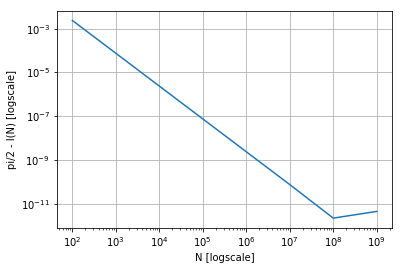

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Ns, Is)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('N [logscale]')
plt.ylabel('pi/2 - I(N) [logscale]')
plt.show()


In [107]:
for N in Ns[:7]:
    print('Time for N = {}'.format(N))
    %timeit integral(N)

Time for N = 100
42.8 µs ± 518 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Time for N = 1000
479 µs ± 5.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Time for N = 10000
5.06 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Time for N = 100000
53 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time for N = 1000000
514 ms ± 4.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time for N = 10000000
5.3 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time for N = 100000000
54.3 s ± 2.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


For my CPU:
* N = 100 -> absolute error of order $10^{-3}$
* N = $10^6$ for times under 1 second -> absolute error of order $10^{-9}$
* N = $10^8$ for times under 1 minute -> absolute error of order $10^{-11}$